In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

資料來源 : [http://data.gov.tw/node/6121](http://data.gov.tw/node/6121)

資料名稱 : 全國郵局ATM分佈

In [2]:
df = pd.read_csv('post_atm.csv', header=None)

In [3]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,基隆市,七堵區,NaN,基隆商工--側門旁,(02)2421-0148,東新街22號,121.717500,25.094999,NaN,NaN,自動補摺機,自動櫃員提款機,局外,0
1,基隆市,七堵區,NaN,基隆監理站--服務台旁,(02)2421-0148,實踐路296號,121.696388,25.088333,NaN,NaN,自動補摺機,自動櫃員提款機,局外,0
2,基隆市,七堵區,NaN,陽明海運--會議室旁,(02)2421-0148,明德一路271號,121.711111,25.094444,NaN,NaN,自動補摺機,自動櫃員提款機,局外,0


In [4]:
df.shape

(2046, 14)

In [5]:
df.count()

0     2046
1     2046
2     1310
3     2046
4     2045
5     2046
6     2046
7     2046
8     1295
9      594
10    1556
11     736
12    2046
13    2046
dtype: int64

In [6]:
df.dtypes

0      object
1      object
2      object
3      object
4      object
5      object
6     float64
7     float64
8      object
9      object
10     object
11     object
12     object
13      int64
dtype: object

欄位說明 : 縣市、鄉鎮市區、儲匯局號、局名、聯絡電話、郵局地址、經度、緯度、自動櫃員機、自動櫃員存提款機、 自動補摺機、自動櫃員提款機、是否為局外ATM、縣市排序代號

In [7]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [8]:
city = df.groupby(0).size()

In [9]:
city.index[city > 200]

Index([u'新北市', u'臺北市', u'高雄市'], dtype='object', name=0)

In [10]:
city[city > 200]

0
新北市    263
臺北市    245
高雄市    239
dtype: int64

In [11]:
town = df.groupby(1).size()

In [12]:
town.describe()

count    355.000000
mean       5.763380
std        7.939411
min        1.000000
25%        1.000000
50%        3.000000
75%        7.000000
max       75.000000
dtype: float64

In [13]:
town.head()

1
七堵區      8
七美鄉      1
七股區      2
三地門鄉     1
三峽區     10
dtype: int64

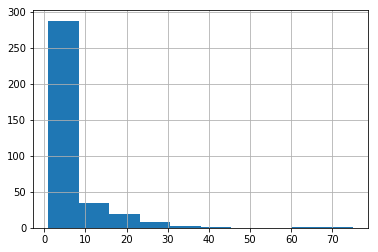

In [14]:
town.hist()

In [15]:
len(town)

355

In [16]:
town[town > 50]

1
中正區    61
東區     75
dtype: int64

In [17]:
town_n = df.groupby([0, 1]).size()
len(town_n)

366

In [18]:
town_n.head()

0    1  
南投縣  中寮鄉     2
     仁愛鄉     2
     信義鄉     2
     南投市    13
     名間鄉     4
dtype: int64

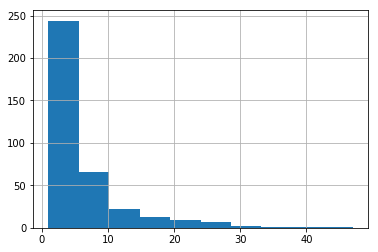

In [19]:
town_n.hist()

In [20]:
df[df[1] == '東區'].groupby(0).size()

0
嘉義市    22
新竹市    29
臺中市     7
臺南市    17
dtype: int64

In [21]:
df[df[1] == '中正區'].groupby(0).size()

0
基隆市    14
臺北市    47
dtype: int64

In [22]:
'''
自動櫃員機(8)、自動櫃員存提款機(9)、 自動補摺機(10)、
自動櫃員提款機(11)、是否為局外ATM(12)
'''
df[8].unique()

array([nan, '\xe8\x87\xaa\xe5\x8b\x95\xe6\xab\x83\xe5\x93\xa1\xe6\xa9\x9f'], dtype=object)

In [23]:
c8 = df[8].unique().tolist()
df[8].apply(lambda x:c8.index(x))[3:10]

3    0
4    0
5    1
6    1
7    1
8    0
9    1
Name: 8, dtype: int64

In [24]:
df[8][3:10]

3      NaN
4      NaN
5    自動櫃員機
6    自動櫃員機
7    自動櫃員機
8      NaN
9    自動櫃員機
Name: 8, dtype: object

In [25]:
legend = []
for i in range(8,13):
    legend.append(df[i].unique().tolist())

In [26]:
legend

[[nan, '\xe8\x87\xaa\xe5\x8b\x95\xe6\xab\x83\xe5\x93\xa1\xe6\xa9\x9f'],
 [nan,
  '\xe8\x87\xaa\xe5\x8b\x95\xe6\xab\x83\xe5\x93\xa1\xe5\xad\x98\xe6\x8f\x90\xe6\xac\xbe\xe6\xa9\x9f'],
 ['\xe8\x87\xaa\xe5\x8b\x95\xe8\xa3\x9c\xe6\x91\xba\xe6\xa9\x9f',
  nan,
  '\xe8\x87\xaa\xe5\x8b\x95\xe8\xa3\x9c\xe6\x91\xba\xe6\xa9\x9f(\xe7\x87\x9f\xe6\xa5\xad\xe5\xbb\xb3)'],
 ['\xe8\x87\xaa\xe5\x8b\x95\xe6\xab\x83\xe5\x93\xa1\xe6\x8f\x90\xe6\xac\xbe\xe6\xa9\x9f',
  nan],
 ['\xe5\xb1\x80\xe5\xa4\x96', '\xe5\xb1\x80\xe5\x85\xa7']]

In [27]:
df[10].value_counts()

自動補摺機(營業廳)    1114
自動補摺機          442
Name: 10, dtype: int64

In [28]:
import geopandas as gpd

In [29]:
geo = [gpd.geoseries.Point(loc) for loc in zip(df[6], df[7])]

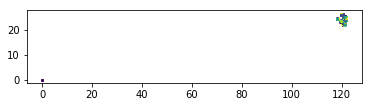

In [30]:
atm = gpd.GeoDataFrame(df, crs={'init': 'epsg:4326'}, geometry=geo)
atm.plot()

In [31]:
atm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,geometry
0,基隆市,七堵區,NaN,基隆商工--側門旁,(02)2421-0148,東新街22號,121.717500,25.094999,NaN,NaN,自動補摺機,自動櫃員提款機,局外,0,POINT (121.7175 25.094999)
1,基隆市,七堵區,NaN,基隆監理站--服務台旁,(02)2421-0148,實踐路296號,121.696388,25.088333,NaN,NaN,自動補摺機,自動櫃員提款機,局外,0,POINT (121.696388 25.088333)
2,基隆市,七堵區,NaN,陽明海運--會議室旁,(02)2421-0148,明德一路271號,121.711111,25.094444,NaN,NaN,自動補摺機,自動櫃員提款機,局外,0,POINT (121.711111 25.094444)
3,基隆市,七堵區,NaN,臺灣鐵路局七堵機務段--室內,(02)2421-0148,崇禮街1-4號,121.715555,25.096111,NaN,NaN,自動補摺機,自動櫃員提款機,局外,0,POINT (121.715555 25.096111)
4,基隆市,七堵區,NaN,麗景天下社區--社區警衛室旁,(02)2421-0148,麗景一街2號,121.672499,25.086111,NaN,NaN,NaN,自動櫃員提款機,局外,0,POINT (121.672499 25.086111)


In [32]:
# boundary info, https://epsg.io/3824
boundary = gpd.GeoSeries([gpd.geoseries.Polygon(
    [(114.32, 17.36), (114.32,26.96), (123.61, 26.96), (123.61,17.36)])]
)

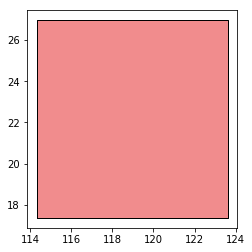

In [33]:
boundary.plot()

In [34]:
atmList = gpd.GeoSeries(geo)

In [35]:
atmList = atmList.apply(lambda x: gpd.GeoSeries([
    gpd.geoseries.Polygon([(114.32, 17.36), (114.32,26.96), (123.61, 26.96), (123.61,17.36)])
]).contains(x))

In [36]:
len(atmList)

2046

In [37]:
atmList.head()

,0
0,True
1,True
2,True
3,True
4,True


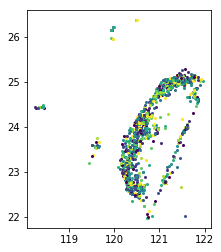

In [38]:
atm[atmList[0].tolist()].plot()

In [39]:
atm = atm[atmList[0].tolist()]
len(atm)

2043

資料來源 : [https://data.gov.tw/dataset/7441](https://data.gov.tw/dataset/7441)

資料名稱 : 鄉鎮市區界線(TWD97經緯度)

In [40]:
shp = gpd.read_file('TOWN_MOI_1060601/TOWN_MOI_1060525.shp')

In [41]:
shp.head()

,COUNTYCODE,COUNTYID,COUNTYNAME,TOWNCODE,TOWNENG,TOWNID,TOWNNAME,geometry
0,10014,V,臺東縣,10014020,Chenggong Township,V02,成功鎮,"POLYGON ((121.409815737 23.21369278500009, 121..."
1,10013,T,屏東縣,10013210,Jiadong Township,T21,佳冬鄉,"POLYGON ((120.5484580210001 22.46067220300006,..."
2,10009,P,雲林縣,10009130,Mailiao Township,P13,麥寮鄉,"POLYGON ((120.3019750420001 23.81624614400005,..."
3,10014,V,臺東縣,10014110,Lvdao Township,V11,綠島鄉,"(POLYGON ((121.491547243 22.67745703900005, 12..."
4,10014,V,臺東縣,10014160,Lanyu Township,V16,蘭嶼鄉,(POLYGON ((121.6117956420001 21.94289657000007...


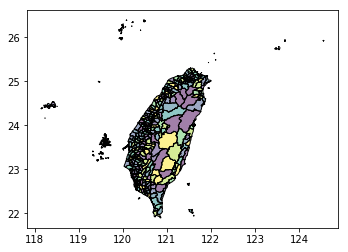

In [42]:
shp.plot()

In [43]:
shp.crs

{u'ellps': u'GRS80', u'no_defs': True, u'proj': u'longlat'}

In [44]:
len(shp.TOWNNAME.unique())

357

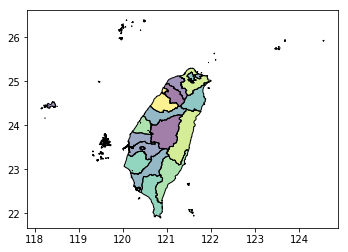

In [45]:
dis_shp = shp.dissolve(by='COUNTYNAME')
dis_shp.plot()

In [46]:
dis_shp.crs = {'init': 'epsg:3824'}

In [47]:
dis_shp.head(1)

,geometry,COUNTYCODE,COUNTYID,TOWNCODE,TOWNENG,TOWNID,TOWNNAME
COUNTYNAME,,,,,,,
南投縣,"POLYGON ((121.2349134150001 23.81811208100004,...",10008,M,10008010,Nantou City,M01,南投市


In [48]:
dis_shp = dis_shp.to_crs({'init': 'epsg:3826'})
dis_shp.head(1)

,geometry,COUNTYCODE,COUNTYID,TOWNCODE,TOWNENG,TOWNID,TOWNNAME
COUNTYNAME,,,,,,,
南投縣,"POLYGON ((273933.98386178 2634899.610075876, 2...",10008,M,10008010,Nantou City,M01,南投市


In [49]:
select = shp[shp['COUNTYNAME'] == u'臺東縣']

In [51]:
select.to_file('select.shp')

In [52]:
select.head()

,COUNTYCODE,COUNTYID,COUNTYNAME,TOWNCODE,TOWNENG,TOWNID,TOWNNAME,geometry
0,10014,V,臺東縣,10014020,Chenggong Township,V02,成功鎮,"POLYGON ((121.409815737 23.21369278500009, 121..."
3,10014,V,臺東縣,10014110,Lvdao Township,V11,綠島鄉,"(POLYGON ((121.491547243 22.67745703900005, 12..."
4,10014,V,臺東縣,10014160,Lanyu Township,V16,蘭嶼鄉,(POLYGON ((121.6117956420001 21.94289657000007...
140,10014,V,臺東縣,10014030,Guanshan Township,V03,關山鎮,"POLYGON ((121.225599643 23.02632788100004, 121..."
141,10014,V,臺東縣,10014050,Luye Township,V09,鹿野鄉,"POLYGON ((121.1941896770001 22.93666974800004,..."


In [54]:
select_shp = gpd.read_file('select.shp')

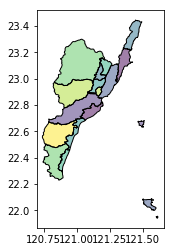

In [55]:
select_shp.plot()

In [56]:
for i, r in select.iterrows():
    print("{0}, {1}".format(i, r['geometry'].area))

0, 0.0129002971037
3, 0.00125219634384
4, 0.00413653736142
140, 0.00531751052239
141, 0.00702304010398
142, 0.00698394983823
143, 0.0787322045915
144, 0.0423121498512
171, 0.0340064470895
195, 0.00993751576846
196, 0.0374352438727
197, 0.0190654849321
198, 0.0133070091913
199, 0.00912149782678
200, 0.0053735830023
201, 0.0283233710522


In [57]:
select_shp.head()

,COUNTYCODE,COUNTYID,COUNTYNAME,TOWNCODE,TOWNENG,TOWNID,TOWNNAME,geometry
0,10014,V,???,10014020,Chenggong Township,V02,???,"POLYGON ((121.409815737 23.21369278500009, 121..."
1,10014,V,???,10014110,Lvdao Township,V11,???,"(POLYGON ((121.491547243 22.67745703900005, 12..."
2,10014,V,???,10014160,Lanyu Township,V16,???,(POLYGON ((121.6117956420001 21.94289657000007...
3,10014,V,???,10014030,Guanshan Township,V03,???,"POLYGON ((121.225599643 23.02632788100004, 121..."
4,10014,V,???,10014050,Luye Township,V09,???,"POLYGON ((121.1941896770001 22.93666974800004,..."


In [58]:
select.head()

,COUNTYCODE,COUNTYID,COUNTYNAME,TOWNCODE,TOWNENG,TOWNID,TOWNNAME,geometry
0,10014,V,臺東縣,10014020,Chenggong Township,V02,成功鎮,"POLYGON ((121.409815737 23.21369278500009, 121..."
3,10014,V,臺東縣,10014110,Lvdao Township,V11,綠島鄉,"(POLYGON ((121.491547243 22.67745703900005, 12..."
4,10014,V,臺東縣,10014160,Lanyu Township,V16,蘭嶼鄉,(POLYGON ((121.6117956420001 21.94289657000007...
140,10014,V,臺東縣,10014030,Guanshan Township,V03,關山鎮,"POLYGON ((121.225599643 23.02632788100004, 121..."
141,10014,V,臺東縣,10014050,Luye Township,V09,鹿野鄉,"POLYGON ((121.1941896770001 22.93666974800004,..."


In [59]:
gpd.sjoin(atm, select, op='within').head()

,0,1,2,3,4,5,6,7,8,9,...,13,geometry,index_right,COUNTYCODE,COUNTYID,COUNTYNAME,TOWNCODE,TOWNENG,TOWNID,TOWNNAME
1830,臺東縣,大武鄉,026124-2,大武郵局,(089)791-031,臺東縣大武鄉大武村大武街60號,120.906000,22.358000,自動櫃員機,NaN,...,190,POINT (120.906 22.358),200,10014,V,臺東縣,10014100,Dawu Township,V05,大武鄉
1831,臺東縣,太麻里鄉,026113-4,太麻里郵局,(089)781-319,臺東縣太麻里鄉泰和村太麻里街191號,121.002752,22.605783,自動櫃員機,NaN,...,190,POINT (121.002752 22.605783),199,10014,V,臺東縣,10014090,Taimali Township,V06,太麻里鄉
1832,臺東縣,太麻里鄉,026114-8,金峰金崙郵局,(089)771-056,臺東縣太麻里鄉金崙村323號,120.964110,22.533380,自動櫃員機,NaN,...,190,POINT (120.96411 22.53337999999999),199,10014,V,臺東縣,10014090,Taimali Township,V06,太麻里鄉
1833,臺東縣,成功鎮,026121-1,成功郵局,(089)851-039,臺東縣成功鎮中華路77號,121.378060,23.100410,自動櫃員機,自動櫃員存提款機,...,190,POINT (121.37806 23.10041),0,10014,V,臺東縣,10014020,Chenggong Township,V02,成功鎮
1834,臺東縣,池上鄉,026120-8,池上郵局,(089)862-071,臺東縣池上鄉中山路201號,121.218000,23.124300,自動櫃員機,NaN,...,190,POINT (121.218 23.1243),142,10014,V,臺東縣,10014060,Chishang Township,V10,池上鄉


In [60]:
select = select.to_crs({'init': 'epsg:4326'})

In [61]:
len(select)

16

In [62]:
sj = gpd.sjoin(atm, select, op='within').groupby([0,1]).size().to_frame()

In [63]:
sj.columns = ['COUNT']

In [64]:
sj = sj.reset_index()

In [65]:
sj.columns = ['COUNTYNAME', 'TOWNNAME', 'COUNT']

In [66]:
sj

,COUNTYNAME,TOWNNAME,COUNT
0,臺東縣,卑南鄉,2
1,臺東縣,大武鄉,1
2,臺東縣,太麻里鄉,2
3,臺東縣,延平鄉,1
4,臺東縣,成功鎮,1
5,臺東縣,東河鄉,3
6,臺東縣,池上鄉,1
7,臺東縣,海端鄉,1
8,臺東縣,綠島鄉,1
9,臺東縣,臺東市,20


In [67]:
select.head()

,COUNTYCODE,COUNTYID,COUNTYNAME,TOWNCODE,TOWNENG,TOWNID,TOWNNAME,geometry
0,10014,V,臺東縣,10014020,Chenggong Township,V02,成功鎮,"POLYGON ((121.409815737 23.21369278500009, 121..."
3,10014,V,臺東縣,10014110,Lvdao Township,V11,綠島鄉,"(POLYGON ((121.491547243 22.67745703900005, 12..."
4,10014,V,臺東縣,10014160,Lanyu Township,V16,蘭嶼鄉,(POLYGON ((121.6117956420001 21.94289657000007...
140,10014,V,臺東縣,10014030,Guanshan Township,V03,關山鎮,"POLYGON ((121.225599643 23.02632788100005, 121..."
141,10014,V,臺東縣,10014050,Luye Township,V09,鹿野鄉,"POLYGON ((121.1941896770001 22.93666974800004,..."


In [68]:
sj.iloc[4].TOWNNAME == select.iloc[0].TOWNNAME

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  """Entry point for launching an IPython kernel.


False

In [69]:
sj.TOWNNAME.astype(str)

0      卑南鄉
1      大武鄉
2     太麻里鄉
3      延平鄉
4      成功鎮
5      東河鄉
6      池上鄉
7      海端鄉
8      綠島鄉
9      臺東市
10     蘭嶼鄉
11     達仁鄉
12     長濱鄉
13     關山鎮
14     鹿野鄉
Name: TOWNNAME, dtype: object

In [70]:
sj.iloc[4].TOWNNAME

'\xe6\x88\x90\xe5\x8a\x9f\xe9\x8e\xae'

In [71]:
sj.iloc[4].TOWNNAME.decode('utf8')

u'\u6210\u529f\u93ae'

In [72]:
sj.TOWNNAME = sj.TOWNNAME.apply(lambda x: x.decode('utf8'))

In [73]:
sj.iloc[4].TOWNNAME == select.iloc[0].TOWNNAME

True

In [74]:
select = select.merge(sj, on='TOWNNAME', how='left')

In [75]:
select.head()

,COUNTYCODE,COUNTYID,COUNTYNAME_x,TOWNCODE,TOWNENG,TOWNID,TOWNNAME,geometry,COUNTYNAME_y,COUNT
0,10014,V,臺東縣,10014020,Chenggong Township,V02,成功鎮,"POLYGON ((121.409815737 23.21369278500009, 121...",臺東縣,1.0
1,10014,V,臺東縣,10014110,Lvdao Township,V11,綠島鄉,"(POLYGON ((121.491547243 22.67745703900005, 12...",臺東縣,1.0
2,10014,V,臺東縣,10014160,Lanyu Township,V16,蘭嶼鄉,(POLYGON ((121.6117956420001 21.94289657000007...,臺東縣,1.0
3,10014,V,臺東縣,10014030,Guanshan Township,V03,關山鎮,"POLYGON ((121.225599643 23.02632788100005, 121...",臺東縣,1.0
4,10014,V,臺東縣,10014050,Luye Township,V09,鹿野鄉,"POLYGON ((121.1941896770001 22.93666974800004,...",臺東縣,2.0


In [76]:
select.COUNT.describe()

count    15.000000
mean      2.600000
std       4.852098
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max      20.000000
Name: COUNT, dtype: float64

In [77]:
select = select.fillna(0)

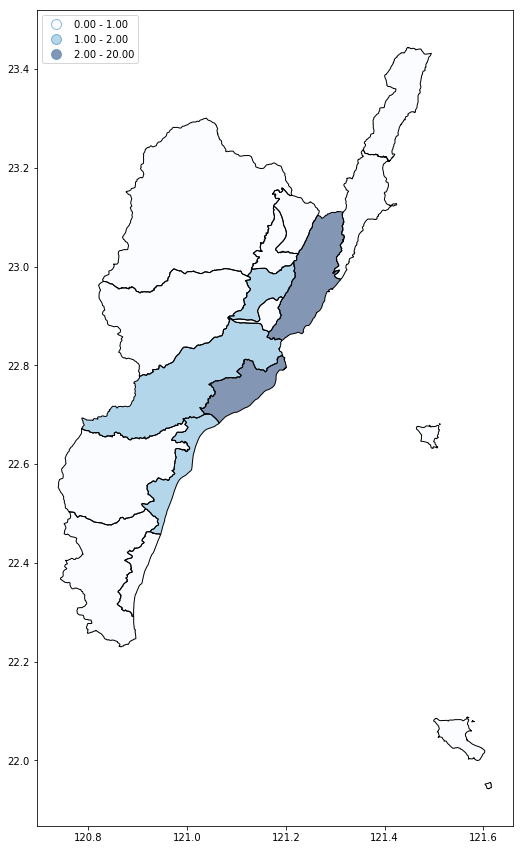

In [78]:
select.plot(column='COUNT', scheme='QUANTILES', figsize=(15, 15), cmap=plt.cm.Blues, legend=True)